## Homework 5

## Due November 18th @ 11:55 PM

I'm really passionate about having you build your own implementations of exisiting algorithms.  In order to understand cars I still remember helping my friend rebuild an engine, and while I'm definitely not a "car person" it was an enlightening expierience nonetheless!  

I thought about having a "use it" assignment - but I realize I can save that for labs.  

For this homework you'll have your **choice** between building two algorithms!  (You will not be responsible for the algorithm you choose not to build).  The two algorithms under discussion in this assignment are **Random Forest Classifier** and **Naive Bayes**.  The first question I will probably get is: "Why can't we build a decision tree from scratch?".  My guess is many of you can but it is incredibly challenging and recursive in nature (recursion seems to be a somewhat "unfun" topic for students).  Therefore - Random Forest is the better way to go here.

**Random Forest instructions below:** 

**You many not import a Random Forest classifier!** 

While a Random Forest is indeed made of decision trees, I will not be making you build decision trees in this random forest, you may simply use the sklearn implementation of the DecsionTreeClassifier and then use those trees to build your Random Forest!  You will not setup a test train split on the data provided (it's loan approval data split into a train/test file).  Fit a Decision Tree model using the training data. Let the tree grow fully. Use the model to predict labels for both training data and test data. Report training accuracy and test accuracy.  Next use cross validation and loop over maximum depths from two to ten inclusive (rebuild the tree each time).  Keep track of the optimal depth that maximizes accuracy.

Time to build your model!  The following are necessary parameters (name them as I did): 

1) - num_estimator, Number of estimators (this is the number of trees in your Random Forest)

2) - pct_ft, Percentage of features you want each tree to use, recall if we have a dataset of 10 features (columns) and each tree in the random forest takes on 5 features at random, you will quite likely have distinct trees.  Just think briefly for a moment, with 10 features choosing 5 features at random, how many trees can you build?  If I were to choose feature 5,4,8,2,1 and feature 8,2,1,5,4 would this yield the same tree or not?  

3) - max_depth, Maximum allowable depth default to letting the Random Forest fully grow but you can limit the growth this param.

You will have a .fit and a .predict like with KNN.  Your code should handle pandas/numpy input (you might choose to standardize it in your model but it needs to be flexible enough to accept either input)

You will cross validate and vary the "depth" you let your tree get too as before (2 to 10 inclusive).  Recall that a tree with N features can grow to N levels deep.  We might be overfitting our data without "pruning" our tree. (in fact decision trees can easily have 100% training accuracy provided no label noise occurs).  Compare the optimal depth that maximizes accuracy and compare it against your result from your decision tree.  What do you notice?

**Naive Bayes instructions below**

**You may not import Naive Bayes classifier!**

For Naive Bayes - you may use the count vectorizer (recall the lab) to store the counts of words, you will find a dataset (other than Ham/Spam for texts/emails) and do light preprocessing (recall the lab) to be able to store words. Make a train/test split of 75%/25%.  You will then make your model, and make predictions (no cross validation) on this one.  This assignment is arguably slightly less work, but less guidance has been provided (to balance each choice out).  Please provide a link where you got your data from (so we don't need to pass around data).  I highly suggest twitter data of two or more tweeters where you can predict on an unkown tweet which tweeter said it.  You can handle the inputted data however you choose, just make sure you are fitting and predicting with your model in your submitted notebook (so I can see how it works from a cursory glance before I get into the code)

**Extra credit:**

I very much enjoy Game Theory and this is a perfect way to apply it to this class!

(26 students are currently enrolled in this course)

I love both of these algorithms so if it were up to me, I'd ask half the class to do one while the other half the class did the other.  Since you have a choice obviously that may not happen, but I will incentivize the 50/50 split.

If I receive a 13/13 split - everyone gets 10 points of extra credit on their assignment.

If I receive a 14/12 split - everyone gets 8 points of extra credit on their assignment.

If I receive a 15/11 split - everyone gets 6 points of extra credit on their assignment.

If I receive a 16/10 split - everyone gets 4 points of extra credit on their assignment.

If I receive a 17/9 split - everyone gets 2 points of extra credit on their assignment.

If I get 18 or more of the same assignment, no penalty just no extra credit.  You do not need to lock in your choice, you merely turn in the assignment so nobody will know until the assignments are graded.

In [1]:
#classify tweet as biden or trump
# trump: https://www.kaggle.com/austinreese/trump-tweets?select=trumptweets.csv
# biden: https://www.kaggle.com/rohanrao/joe-biden-tweets
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import collections
import seaborn as sn

In [2]:
#of the timestamp col, the first 4 values are always the year. I only want the year from the col, so only grab that
def get_year(str_arg):
    return int(str_arg[0:4])

In [3]:
#from the naive bayes lab
def clean_string_short(str_arg,lowercase=False):
    str_arg=re.sub('(?:(?:https?|ftp):\/\/)?[\w/\-?=%.]+\.[\w/\-?=%.]+',"",str_arg) #Get rid of URL links
    clean=re.sub('[^a-z\s]+','',str_arg,flags=re.IGNORECASE) #every char except alphabets is replaced
    clean=re.sub('(\s+)',' ',clean) #multiple spaces now single space
    #converting the cleaned string to lower case (this is maybe not best 
    #idea for our data)
    words = clean.split()
    lc = [i for i in words if len(i) <= 10]
    return " ".join(lc)

In [4]:
trump_raw = pd.read_csv("tweets_trump.csv")

#only tweets from 2016+
trump_raw["date"] = trump_raw["date"].apply(lambda x: get_year(x))
    
t_filtered = trump_raw[trump_raw["date"] >= 2016]

#drop cols that are not needed
t_filtered = t_filtered.drop("id", 1)
t_filtered = t_filtered.drop("link", 1)
t_filtered = t_filtered.drop("date", 1)
t_filtered = t_filtered.drop("favorites", 1)
t_filtered = t_filtered.drop("retweets", 1)
t_filtered = t_filtered.drop("mentions", 1)
t_filtered = t_filtered.drop("hashtags", 1)
t_filtered = t_filtered.drop("geo", 1)

#tweeter col
l = ["Trump"] * len(t_filtered)
t_filtered["tweeter"] = l

print(t_filtered.shape)

#clean data
t_filtered["content"] = t_filtered["content"].apply(lambda x: clean_string_short(x))
#drop empty rows
t_filtered = t_filtered[t_filtered["content"] != ""]
t_filtered = t_filtered[t_filtered["content"] != " "]

print(t_filtered.shape)

#so that both Trump and Biden are equally represented (in the raw data, Trump far outweighs Biden in # of rows)
t_filtered = t_filtered.sample(5000)
t_filtered

(13950, 2)
(13484, 2)


,content,tweeter
28078,I started my business with very little and bui...,Trump
27209,Does anybody remember when Bill Clinton in wor...,Trump
36909,Border Patrol and Law has captured large numbe...,Trump
40296,Neither one of the Democrat star witnesses at ...,Trump
31254,Join me at pm over at the Lincoln Memorial wit...,Trump
...,...,...
37427,I am continuing to monitor the situation in Ve...,Trump
35212,The only thing James Comey ever got right was ...,Trump
27394,Ted Cruz is falling in the polls He is nervous...,Trump
34771,No Collusion No but that doesnt matter because...,Trump


In [5]:
biden_raw = pd.read_csv("tweets_biden.csv")

#only tweets from 2016+
biden_raw["timestamp"] = biden_raw["timestamp"].apply(lambda x: get_year(x))
    
b_filtered = biden_raw[biden_raw["timestamp"] >= 2016]    

#drop cols that are not needed
b_filtered = b_filtered.drop("id", 1)
b_filtered = b_filtered.drop("timestamp", 1)
b_filtered = b_filtered.drop("url", 1)
b_filtered = b_filtered.drop("replies", 1)
b_filtered = b_filtered.drop("retweets", 1)
b_filtered = b_filtered.drop("quotes", 1)
b_filtered = b_filtered.drop("likes", 1)

#so make col names the same between tables so pd can concat them
b_filtered.rename(columns = {"tweet": "content"}, inplace = True)

#tweeter col
l = ["Biden"] * len(b_filtered)
b_filtered["tweeter"] = l

print(b_filtered.shape)
#clean data
b_filtered["content"] = b_filtered["content"].apply(lambda x: clean_string_short(x))
#drop empty rows
b_filtered = b_filtered[b_filtered["content"] != ""]
b_filtered = b_filtered[b_filtered["content"] != " "]

print(b_filtered.shape)
b_filtered = b_filtered.sample(5000)
b_filtered

(5161, 2)
(5148, 2)


,content,tweeter
2216,There is no between mental health and physical...,Biden
1936,Last night on the debate stage I shared my bol...,Biden
1069,Were live in a few minutes to talk about how w...,Biden
1569,Under President Trumps policies a was separate...,Biden
5431,In this moment were facing both a public healt...,Biden
...,...,...
1407,TeamJoe is hosting house parties across the co...,Biden
1044,LGBT rights are human rights Prejudice is prej...,Biden
1188,The United States should be leading on this is...,Biden
3702,Climate change is the crisis of our time On da...,Biden


In [6]:
#combine data, then clean the content of garbage
df = pd.concat([t_filtered, b_filtered])

In [7]:
#shuffle the data, count vectorizer
df = df.sample(frac=1) 

In [8]:
#train test split
x_train,x_test,y_train,y_test = train_test_split(df["content"],df["tweeter"],test_size=.25, stratify=df["tweeter"])

print(x_test.shape, y_test.shape, x_train.shape, y_train.shape)

(2500,) (2500,) (7500,) (7500,)


In [9]:
class nb_360:
    
    def sep_by_class_(self, x):
        seperated = {}
        
        #seperate rows by class
        for i,row in x.iterrows():
            if row["class"] not in seperated:
                seperated[row["class"]] = []
            seperated[row["class"]].append(row)            
            
        #index of this class corresponds to the class names
        self.classes = list()
        for item in seperated:
            self.classes.append(item)
        
        #return a list of dataframes for each class/index
        result = list()
        for c in self.classes:
            result.append(pd.DataFrame(seperated[c]))
            
        return result
    
    def create_cvs_(self, dfs_list):
        result = list()    
                    
        #create a count vectorizer for each df
        for df in dfs_list:
            cv = CountVectorizer()
            cv.fit(df["content"])
            count_arr = cv.transform(df["content"]).toarray()
            
            #for each df, row=tweet, col=word, and individual cell is the count of that word in the tweet
            result.append(pd.DataFrame(count_arr, columns=cv.get_feature_names()))
                        
        #returns a list of dfs
        return result
        
    
    def fit(self, inputted_x_data, inputted_y_data):
        #take in data
        self.x_data = inputted_x_data
        self.y_data = inputted_y_data
        
        #combine data in order to train
        temp_data = self.x_data
        temp_data["class"] = self.y_data
        
        #use the combined data to get a list of dataframes (1 df for each class)
        self.class_dfs_list = self.sep_by_class_(temp_data)
        
        #using count vectorizer, 
        self.final_dfs = self.create_cvs_(self.class_dfs_list)
        
        #gets the count of total words (not unique) for each df
        total_words_per_class = list()
        for i in range(len(self.final_dfs)):
            total_words_per_class.append(self.final_dfs[i].to_numpy().sum())
        
        #gets total words (not unique) for ALL dfs in order to get ratio
        self.total_words = 0
        for n in total_words_per_class:
            self.total_words += n
        
        #probablity that a tweet came from class at index i
        self.prob_per_class = list()
        denom = self.total_words
        for i in range(len(total_words_per_class)):
            self.prob_per_class.append(total_words_per_class[i]/self.total_words)
        
    def prob_of_word_(self, word, class_i):
        #laplace smoothing, so no probability ends up being 0
        alpha = 1
        
        #only attempt further operations if the word exists in the existing df, otherwise utilize alpha to make value nonzero
        if word in self.final_dfs[class_i]:
            l = self.final_dfs[class_i][word].value_counts().to_dict()
        else:
            return (alpha)/(self.total_words+alpha)
        
        #number of times the word occured in the given df
        p_of_word = 0
        for key,value in l.items():
            p_of_word += (key*value)
        
        #return the number of instances / total words, end up with porportion of word in df
        p_of_word = (p_of_word+alpha)/(self.total_words+alpha)
        
        return p_of_word
        
    #given a list of words, determine the class
    def classify_(self, tweet):
        prob_of_class_list = list()
        
        #start each class operation with the P(class)
        for i in range(len(self.classes)):
            prob_of_class_list.append(self.prob_per_class[i])
                
        #for each class,
        for i in range(len(self.classes)):
            #get probability of each word and multiply it into the final prediction value
            for word in tweet:
                prob_of_class_list[i] = prob_of_class_list[i] * self.prob_of_word_(word,i)
        
        #return most likely tweeter, aka the larget prediction value
        return self.classes[prob_of_class_list.index(max(prob_of_class_list))]
        
    def predict(self, test_data):
        result_list = list()
        #for each row in the df
        for i,row in test_data.iterrows():
            #row to string, cut off the unecessary data, then split into each individual word
            tweet = row.to_string()[11:].split(" ")
            #append the prediction
            result_list.append(self.classify_(tweet))
        
        #returns a list of each prediction
        return (result_list)


In [10]:
nb = nb_360()
nb.fit(x_train.to_frame(), y_train.to_frame())
pred = nb.predict(x_test.to_frame())

AxesSubplot(0.125,0.125;0.62x0.755)


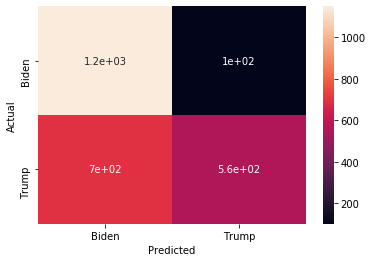

In [11]:
data = {'y_Predicted': pred,
        'y_Actual':    y_test
        }

df_conf = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df_conf['y_Actual'], df_conf['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

print(sn.heatmap(confusion_matrix, annot=True))

Seems to work decently, but it way overpredicts in Biden's favor. I imagine this has to do with the P(class) value through pretty much every calculation in favor of Biden (his was ~.56, while Trump's was ~.44). There were also a decent number of garbage words generated by the cleaning (but still an improvement over unfiltered data). 